![image](https://www.earth.ac.cr/wp-content/themes/cummins/images/logo-es.png)
### Curso de Programación aplicada a la agricultura
### Material de apoyo Tema Análisis de Datos
### Jupyter_## Iteraciones en Python

### Plantilla para el Cálculo de ETO mensual y el balance hidrológico 

El presente Notebook permité, a partir de una serie de datos climáticos mensuales, descargados de la herramienta POWER NASA https://power.larc.nasa.gov/data-access-viewer/  poder calcular:
- Gráfico descriptivo de temperatura 
- Cálculo del ETo por el método de Hargreaves
- Graficar una gráfico de relación hidrólogica (ETO & Precipitación por mes)

Se sugiero el siguiente video para observar el proceso de descarga de datos de la herramienta de la nasa https://youtu.be/afRYneIQWbo 


### Preparado por:
Prof. Gregory Guevara, 
Enero 2023, gguevara@earth.ac.cr



In [1]:
#Apertura de directorios 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


#open data frame de excel 
df = pd.read_excel(r'C:\Users\gguevara\OneDrive - Universidad EARTH\Curso de Programación\materiales\Tema 2\EARTH.xlsx')

#limpieza y acomodo de los datos
df= df.dropna() # me permite borrar valores vacios 
df= df[df!= 0] #Borrar registros con valores 0 en columnas donde no # tiene sentido.


#data frame de medias tomado de la tabla de DATA ACCESS Viewer de la NASA sin encabezado
df_parameter=df.groupby("PARAMETER").mean() 
df_parameter=df_parameter.transpose()
df_parameter=df_parameter.iloc[3:15]

#definir la temperatura media 
def Temp_media(fila):
    Temp= (fila["T2M_MAX"]+fila["T2M_MIN"])/2
    return Temp
df_parameter["Temp_media"]=df_parameter.apply(Temp_media,axis=1)

# ingresar la columna de los días por mes
df_parameter["dias"]=[31,28,31,30,31,30,31,31,30,31,30,31]

#calcular e ingresar la columna de RADIACION en mm/dia 
def Rad_mmday(ALLSKY_TOA_SW_DWN): 
    Rad=ALLSKY_TOA_SW_DWN/2.45
    return Rad
df_parameter["Rad"]=df_parameter["ALLSKY_TOA_SW_DWN"].apply(Rad_mmday)

#calcular e ingresar la columna de ETO mm/dia 
def Eto_dia(fila):
    Etodia= 0.0023*(fila["Temp_media"]+17.78)*fila["Rad"]*(fila["T2M_MAX"]-fila["T2M_MIN"])**0.5
    return Etodia
df_parameter["Eto_Dia"]=df_parameter.apply(Eto_dia,axis=1)

#calcular e ingresar la columna de ETO mm/mes 
def Eto_mes(fila):
    Etomes= fila["Eto_Dia"]*fila["dias"]
    return Etomes
df_parameter["Eto_mes"]=df_parameter.apply(Eto_mes,axis=1)

#definir la salida 
df_parameter=df_parameter.round(3)
print(df_parameter)
print(df_parameter.describe())

df_parameter.to_csv("clima_Liberia")



PARAMETER  ALLSKY_TOA_SW_DWN  PRECTOT  T2M_MAX  T2M_MIN  Temp_media  dias  \
JAN                   31.842   84.087   24.886   19.134      22.010    31   
FEB                   34.464   55.494   25.671   18.971      22.321    28   
MAR                   36.939   46.252   27.075   19.163      23.119    31   
APR                   37.961   77.527   28.171   20.068      24.119    30   
MAY                   37.649  201.011   27.246   20.947      24.096    31   
JUN                   37.025  208.145   25.890   21.014      23.452    30   
JUL                   37.128  213.485   25.323   20.641      22.982    31   
AUG                   37.438  198.036   25.522   20.570      23.046    31   
SEP                   36.927  204.699   25.661   20.537      23.099    30   
OCT                   35.046  242.226   25.299   20.564      22.932    31   
NOV                   32.371  195.030   25.041   20.143      22.592    30   
DEC                   30.845  128.646   24.856   19.665      22.260    31   

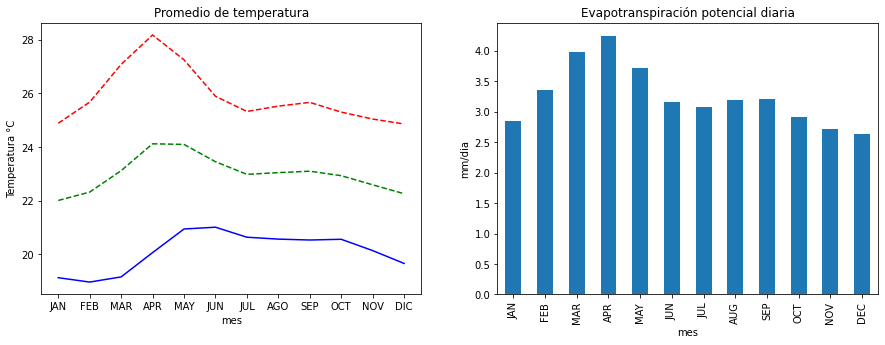

In [2]:

meses=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']

fig = plt.figure(figsize=(15,5))

#grafico de lineas de temperatura
plot1 = fig.add_subplot(121)
A=plt.plot(meses, df_parameter["T2M_MAX"], 'r--', meses, df_parameter["T2M_MIN"], 'b', meses, df_parameter["Temp_media"], 'g--')
plt.xlabel('mes')
plt.ylabel('Temperatura °C')
plt.title('Promedio de temperatura')


#gráfico de barras ETO 
plot2 = fig.add_subplot(122)
b=df_parameter["Eto_Dia"].plot(kind="bar")

plt.xlabel('mes')
plt.ylabel('mm/dia')
plt.title('Evapotranspiración potencial diaria')
plt.show()


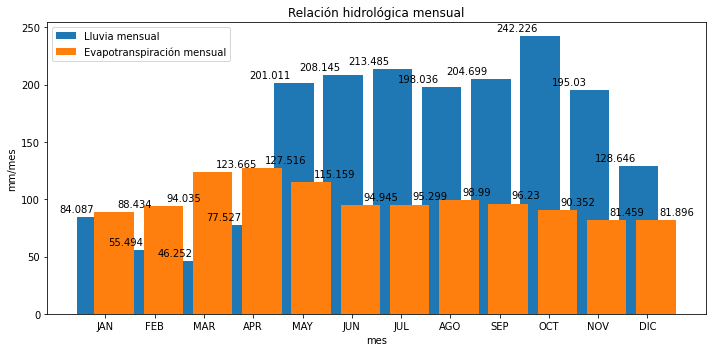

In [3]:


#gráfico de barras ETO y PREci (barras combinadas) 
ind = np.arange(len(df_parameter["Eto_mes"]))  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind - width/2, df_parameter["PRECTOT"], 
                label='Lluvia mensual')
rects2 = ax.bar(ind + width/2, df_parameter["Eto_mes"], 
                label='Evapotranspiración mensual')

ax.set_ylabel('mm/mes')
ax.set_title('Relación hidrológica mensual')
ax.set_xticks(ind)
ax.set_xlabel('mes')
ax.set_xticklabels(('JAN','FEB','MAR','APR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
autolabel(rects1, "left")
autolabel(rects2, "right")
fig.tight_layout()
plt.show()


